In [61]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt


In [73]:

headers = {'User-Agent': 'youremail@gmail.com'}

tickers = requests.get("https://www.sec.gov/files/company_tickers.json")
tickers = pd.json_normalize(pd.json_normalize(tickers.json(), max_level=0).values[0])
tickers['cik_str'] = 'CIK000' + tickers['cik_str'].astype(str)

tickers.columns


Index(['cik_str', 'ticker', 'title'], dtype='object')

In [80]:
for i in range(len(tickers[:5])):

    print(tickers['title'][i])

Apple Inc.
MICROSOFT CORP
Alphabet Inc.
AMAZON COM INC
BERKSHIRE HATHAWAY INC


In [75]:
for i in range(len(tickers[:5])):
    print(tickers['cik_str'][i])

CIK000320193
CIK000789019
CIK0001652044
CIK0001018724
CIK0001067983


In [87]:
full = pd.DataFrame()
for i in range(len(tickers[:9])):
    time.sleep(.1)
    try:
        response = requests.get(f"https://data.sec.gov/api/xbrl/companyconcept/{tickers['cik_str'][i]}/us-gaap/Assets.json", headers=headers)
        assets = pd.json_normalize(response.json()['units']['USD'])
        assets['ticker'] = tickers['ticker'][i]
    except:
        pass
    
    full = pd.concat([assets, full], axis=0)   
    
full     
        

,end,val,accn,fy,fp,form,filed,frame,ticker
0,2008-09-30,34981000000,0001193125-09-159678,2009,Q3,10-Q,2009-07-30,NaN,V
1,2008-09-30,34981000000,0001193125-09-239249,2009,FY,10-K,2009-11-20,CY2008Q3I,V
2,2009-06-30,32624000000,0001193125-09-159678,2009,Q3,10-Q,2009-07-30,CY2009Q2I,V
3,2009-09-30,32281000000,0001193125-09-239249,2009,FY,10-K,2009-11-20,NaN,V
4,2009-09-30,32281000000,0001193125-10-020834,2010,Q1,10-Q,2010-02-03,NaN,V
...,...,...,...,...,...,...,...,...,...
105,2022-03-31,81808000000,0001403161-22-000027,2022,Q2,10-Q,2022-04-28,CY2022Q1I,V
106,2022-06-30,85410000000,0001403161-22-000058,2022,Q3,10-Q,2022-07-28,CY2022Q2I,V
107,2022-09-30,85501000000,0001403161-22-000081,2022,FY,10-K,2022-11-16,NaN,V
108,2022-09-30,85501000000,0001403161-23-000013,2023,Q1,10-Q,2023-01-27,CY2022Q3I,V


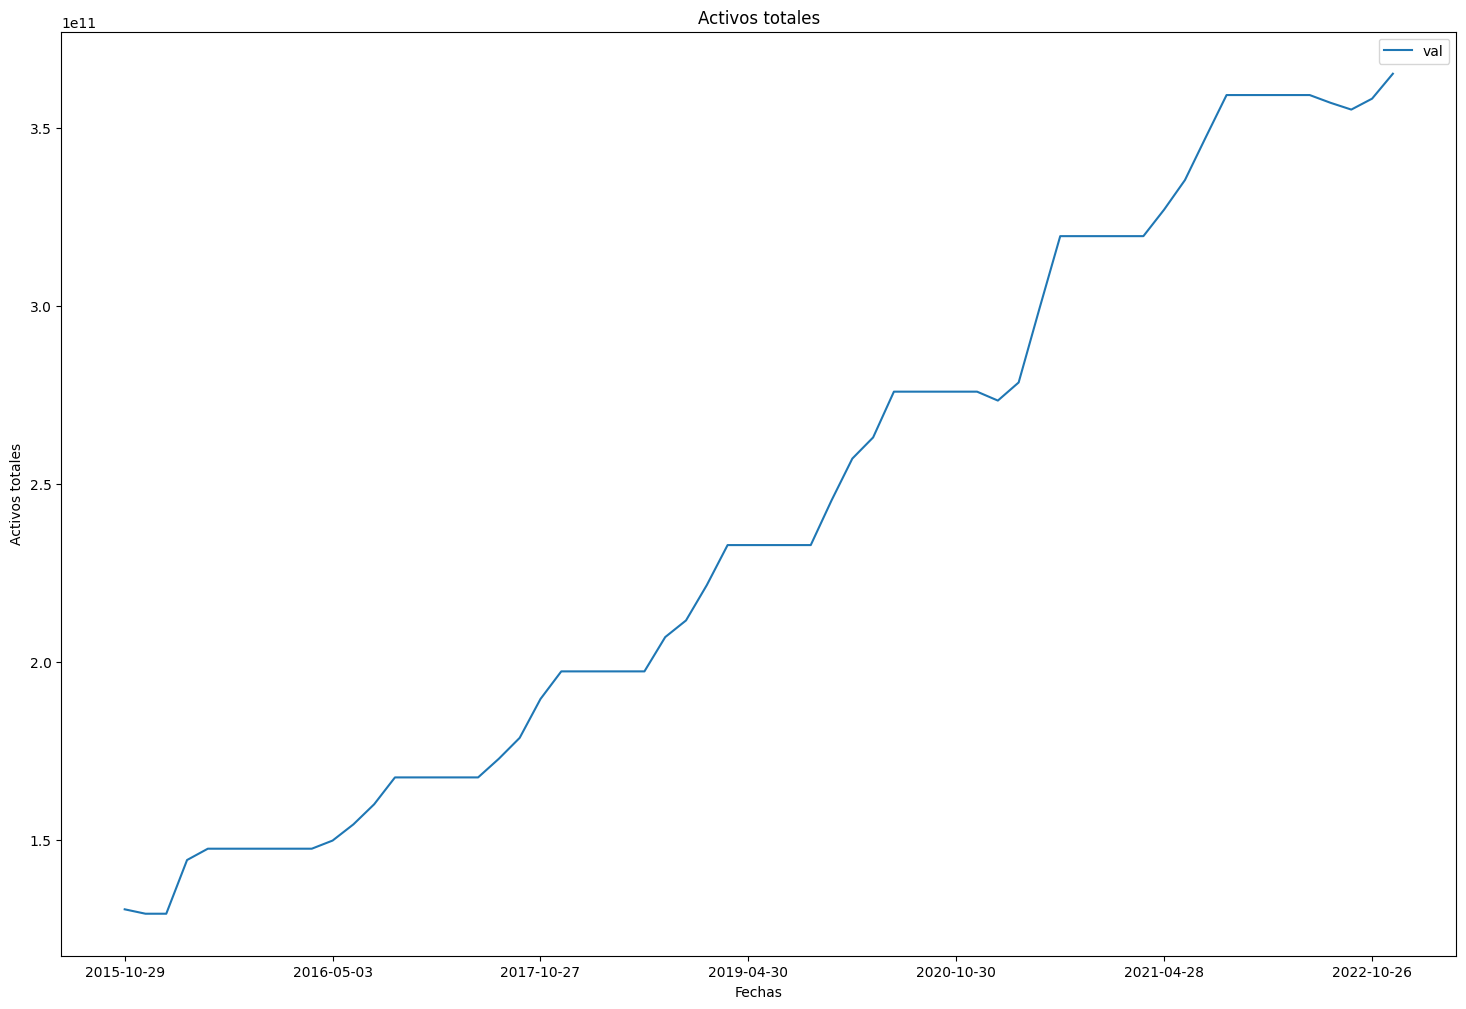

In [113]:
googl = full[['filed', 'val']][full['ticker'] == 'GOOGL'].set_index('filed')
googl.plot(figsize=(18,12), title='Activos totales', xlabel='Fechas', ylabel='Activos totales')

plt.show()

In [103]:
set(full['ticker'])

{'AMZN', 'BRK-B', 'GOOGL', 'META', 'NVDA', 'TSLA', 'V'}